In [1]:
import yfinance as yf
import pandas as pd
import datetime
import time
import requests
import io
import requests
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
nifty_stocks = pd.read_csv("ind_nifty50list.csv")
tickers = nifty_stocks['Symbol'].tolist()
tickers = [s + '.NS' for s in tickers]

In [77]:
stock_data = yf.download(tickers,'2014-12-1')

[*********************100%***********************]  50 of 50 completed


In [79]:
index_data = yf.download('^NSEI','2014-12-1')

[*********************100%***********************]  1 of 1 completed


In [80]:
stock_close = stock_data['Adj Close']

In [81]:
stock_close.isna().sum()

ADANIPORTS.NS      0
ASIANPAINT.NS      0
AXISBANK.NS        0
BAJAJ-AUTO.NS      0
BAJAJFINSV.NS      0
BAJFINANCE.NS      0
BHARTIARTL.NS      1
BPCL.NS            0
BRITANNIA.NS       0
CIPLA.NS           0
COALINDIA.NS       0
DIVISLAB.NS        0
DRREDDY.NS         0
EICHERMOT.NS       0
GRASIM.NS          0
HCLTECH.NS         0
HDFC.NS            0
HDFCBANK.NS        0
HDFCLIFE.NS      732
HEROMOTOCO.NS      0
HINDALCO.NS        0
HINDUNILVR.NS      0
ICICIBANK.NS       0
INDUSINDBK.NS      0
INFY.NS            0
IOC.NS             0
ITC.NS             0
JSWSTEEL.NS        0
KOTAKBANK.NS       0
LT.NS              0
M&M.NS             0
MARUTI.NS          0
NESTLEIND.NS       0
NTPC.NS            0
ONGC.NS            0
POWERGRID.NS       0
RELIANCE.NS        0
SBILIFE.NS       700
SBIN.NS            0
SHREECEM.NS        0
SUNPHARMA.NS       0
TATACONSUM.NS      0
TATAMOTORS.NS      0
TATASTEEL.NS       0
TCS.NS             0
TECHM.NS           0
TITAN.NS           0
ULTRACEMCO.NS

In [82]:
stock_close.drop(['SBILIFE.NS','HDFCLIFE.NS'], axis = 1, inplace = True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [83]:
stock_close.fillna(method = 'ffill', inplace = True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [84]:
stock_close.index = pd.to_datetime(stock_close.index)

In [101]:
monthly_stock_close = stock_close.resample('M').last()

In [102]:
yearly_returns = monthly_stock_close.pct_change(periods = 12)

In [103]:
yearly_returns = yearly_returns.iloc[12:]

In [104]:
def get_top_n(prev_returns, top_n):

    l=[]
    for index, row in prev_returns.iterrows():
        
        k=[]
        largest = row.nlargest(top_n).values
        
        for i in row:
            if i in largest:
                k.append(1)
            else:
                k.append(0)

        l.append(k)
    
    return pd.DataFrame(l,prev_returns.index, prev_returns.columns)

In [105]:
top5 = get_top_n(yearly_returns, 5)

In [106]:
def get_bot_n(prev_returns, bot_n):

    l=[]
    for index, row in prev_returns.iterrows():
        
        k=[]
        smallest = row.nsmallest(bot_n).values
        
        for i in row:
            if i in smallest:
                k.append(1)
            else:
                k.append(0)

        l.append(k)
    
    return pd.DataFrame(l,prev_returns.index, prev_returns.columns)

In [107]:
bot5 = get_bot_n(yearly_returns, 5)

In [108]:
monthly_returns = monthly_stock_close.pct_change()
monthly_returns = monthly_returns.iloc[1:]

In [112]:
look_ahead_returns = monthly_returns[12:]

In [121]:
top5_pr = top5.shift(1)
top5_pr = top5_pr[1:]

In [122]:
bot5_pr = bot5.shift(1)
bot5_pr = bot5_pr[1:]

In [123]:
portfolio_return = (top5_pr - bot5_pr)*look_ahead_returns/10

In [125]:
portfolio_return.tail()

,ADANIPORTS.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,BRITANNIA.NS,CIPLA.NS,...,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2021-02-28,0.000000,-0.0,0.000000,-0.0,0.0,0.000000,0.000000,0.0,-0.000000,-0.004704,...,0.0,0.0,0.000000,0.000000,-0.0,-0.0,-0.0,0.0,0.0,-0.001819
2021-03-31,0.003921,0.0,0.003773,-0.0,0.0,-0.000000,-0.000000,-0.0,0.000000,0.003564,...,0.0,0.0,-0.006549,0.013522,0.0,0.0,0.0,0.0,0.0,0.000000
2021-04-30,0.000000,-0.0,0.000000,0.0,0.0,0.000000,-0.003760,-0.0,-0.000000,0.000000,...,0.0,0.0,-0.002634,0.027363,-0.0,-0.0,-0.0,-0.0,-0.0,0.000000
2021-05-31,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000345,0.0,-0.000338,0.000000,...,0.0,-0.0,0.008474,0.008864,0.0,0.0,0.0,0.0,0.0,0.000000
2021-06-30,0.000000,-0.0,-0.000000,-0.0,0.0,0.008743,-0.001112,0.0,-0.003192,0.000000,...,0.0,0.0,0.010039,0.002905,0.0,0.0,0.0,-0.0,0.0,0.000000


In [137]:
pr_series = portfolio_return.sum(axis=1).to_frame()

In [140]:
pr_series.columns = ['Monthly Return']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe4983efc10>]],
      dtype=object)

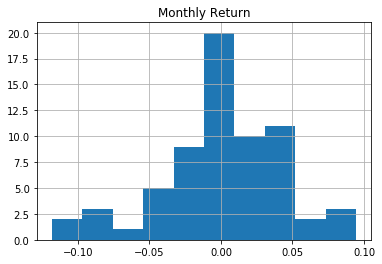

In [145]:
pr_series.hist()

In [150]:
a = [100]
a[0]

100

In [152]:
pr_series['Monthly Return'][0]

0.035327018952133506

In [153]:
for i in range(len(pr_series)):
    x = a[i]*(1+pr_series['Monthly Return'][i])
    a.append(x)

In [159]:
pf_value = pd.DataFrame(a)

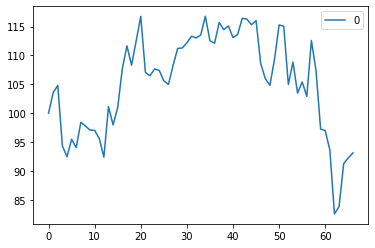

In [162]:
pf_value.plot()